# Visually test the content of the dataset

In [ ]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

: 

### Choose a dataset index and check that the dataset exists

In [110]:
dataset_idx = 3
extended_dataset_path = Path(f"../data/IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE_202211/extended_datasets/dataset_{dataset_idx}.pt")
minimal_dataset_path = Path(f"../data/IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE_202211/minimal_datasets/dataset_{dataset_idx}.pt")
nans_masks_path = Path(f"../data/IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE_202211/nans_masks/nans_mask_{dataset_idx}.pt")

if not nans_masks_path.exists():
    raise FileNotFoundError(f"File {nans_masks_path} does not exist.")
if not minimal_dataset_path.exists():
    raise FileNotFoundError(f"File {minimal_dataset_path} does not exist.")

### Load the dataset

In [111]:
extended_dataset = None
if extended_dataset_path.exists():
    print(f"Loading extended dataset from {extended_dataset_path}")
    extended_dataset = th.load(extended_dataset_path)
    extended_dataset_keys = list(extended_dataset.keys())
    
minimal_dataset = th.load(minimal_dataset_path)
nans_masks = th.load(nans_masks_path)

minimal_dataset_keys = list(minimal_dataset.keys())

### Select a random image and a specific channel to plot and 

In [112]:
random_idx = np.random.randint(0, minimal_dataset[minimal_dataset_keys[0]].shape[0])
masked_channel = 0

In [113]:
minimal_dataset[minimal_dataset_keys[0]][random_idx, masked_channel, :, :]

tensor([[-1.0000, -1.0000, -1.0000,  ...,  0.9749,  0.9748,  0.9740],
        [-1.0000, -1.0000, -1.0000,  ...,  0.9750,  0.9752,  0.9754],
        [-1.0000, -1.0000, -1.0000,  ...,  0.9745,  0.9750,  0.9752],
        ...,
        [ 0.9862,  0.9863,  0.9859,  ..., -1.0000,  0.9884,  0.9875],
        [ 0.9869,  0.9868,  0.9865,  ...,  0.9873,  0.9875,  0.9876],
        [ 0.9868,  0.9867,  0.9867,  ...,  0.9877,  0.9878,  0.9881]])

### Plot the minimal dataset

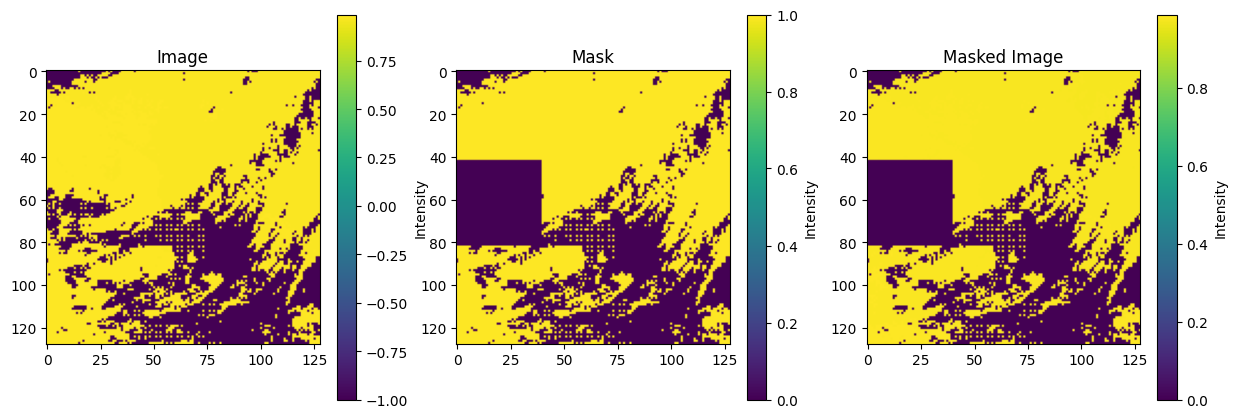

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(minimal_dataset[minimal_dataset_keys[0]][random_idx, masked_channel, :, :].numpy(), cmap='viridis')
axs[0].set_title("Image")
axs[1].imshow(minimal_dataset[minimal_dataset_keys[1]][random_idx, masked_channel, :, :].numpy(), cmap='viridis')
axs[1].set_title("Mask")
axs[2].imshow(minimal_dataset[minimal_dataset_keys[0]][random_idx, masked_channel, :, :].numpy() * minimal_dataset[minimal_dataset_keys[1]][random_idx, masked_channel, :, :].numpy(), cmap='viridis')
axs[2].set_title("Masked Image")
for ax in axs:
    cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical')
    cbar.ax.set_ylabel('Intensity')

### Plot the nans mask

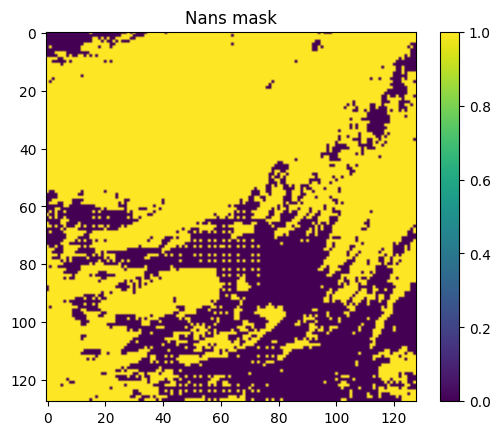

In [115]:
plt.imshow(nans_masks[random_idx, masked_channel, :, :].numpy(), cmap='viridis')
plt.title("Nans mask")
plt.colorbar()

### Plot the extended dataset

In [116]:
if extended_dataset is not None:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(extended_dataset[extended_dataset_keys[0]][random_idx, masked_channel, :, :].numpy(), cmap='viridis')
    axs[0].set_title("Masked image")
    axs[1].imshow(extended_dataset[extended_dataset_keys[1]][random_idx, masked_channel, :, :].numpy(), cmap='viridis')
    axs[1].set_title("Inverse masked image")
    axs[2].imshow(extended_dataset[extended_dataset_keys[2]][random_idx, masked_channel, :, :].numpy(), cmap='viridis')
    axs[2].set_title("Mask")

    for ax in axs:
        cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical')
        cbar.ax.set_ylabel('Intensity')